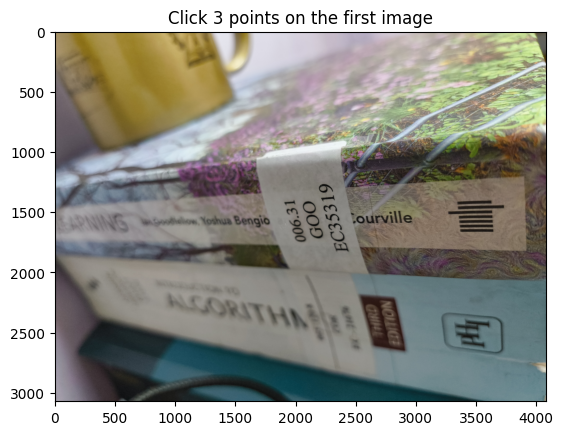

Clicked points on first image: []


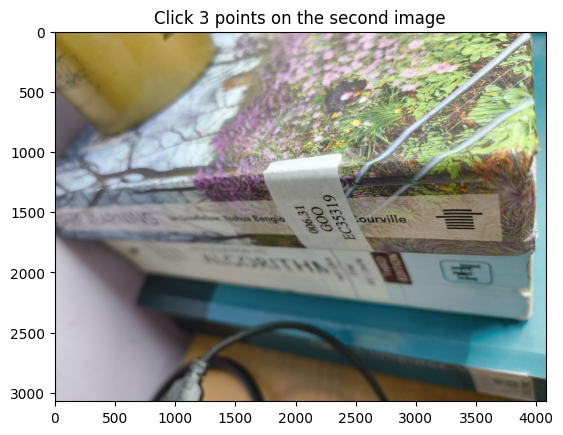

Clicked points on second image: []


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\imgwarp.cpp:3631: error: (-215:Assertion failed) src.checkVector(2, CV_32F) == 3 && dst.checkVector(2, CV_32F) == 3 in function 'cv::getAffineTransform'


In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

clicked_points1 = []
clicked_points2 = []

def onclick1(event):
    x, y = event.xdata, event.ydata
    clicked_points1.append([x, y])
    print(f"Clicked at: ({x}, {y})")  # Print the coordinates
    if len(clicked_points1) == 3:
        plt.close()

def onclick2(event):
    x, y = event.xdata, event.ydata
    clicked_points2.append([x, y])
    print(f"Clicked at: ({x}, {y})")  # Print the coordinates
    if len(clicked_points2) == 3:
        plt.close()

# First image interaction
fig1, ax1 = plt.subplots()
img1 = cv2.imread(r"C:\Users\Manthan\Desktop\jupyter_extension_prettier\vs_code_extension\image_registration_dataset\book_base.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

ax1.imshow(img1)
ax1.set_title("Click 3 points on the first image")
fig1.canvas.mpl_connect('button_press_event', onclick1)
plt.show()

print("Clicked points on first image:", clicked_points1)

# Second image interaction
fig2, ax2 = plt.subplots()
img2 = cv2.imread(r"C:\Users\Manthan\Desktop\jupyter_extension_prettier\vs_code_extension\image_registration_dataset\book_register.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

ax2.imshow(img2)
ax2.set_title("Click 3 points on the second image")
fig2.canvas.mpl_connect('button_press_event', onclick2)
plt.show()

print("Clicked points on second image:", clicked_points2)

# Convert clicked points to NumPy arrays
points1 = np.array(clicked_points1, dtype=np.float32)
points2 = np.array(clicked_points2, dtype=np.float32)

# Compute affine transformation matrix
M = cv2.getAffineTransform(points1, points2)

# Apply the affine transformation to the first image
rows, cols, _ = img1.shape
transformed_img = cv2.warpAffine(img1, M, (cols, rows))

# Display the transformed image
plt.figure()
plt.imshow(transformed_img)
plt.title("Transformed Image")
plt.show()
